#**This is a basic tutorial on how to build a Least Squares Regression Line given a timeseries using python.**


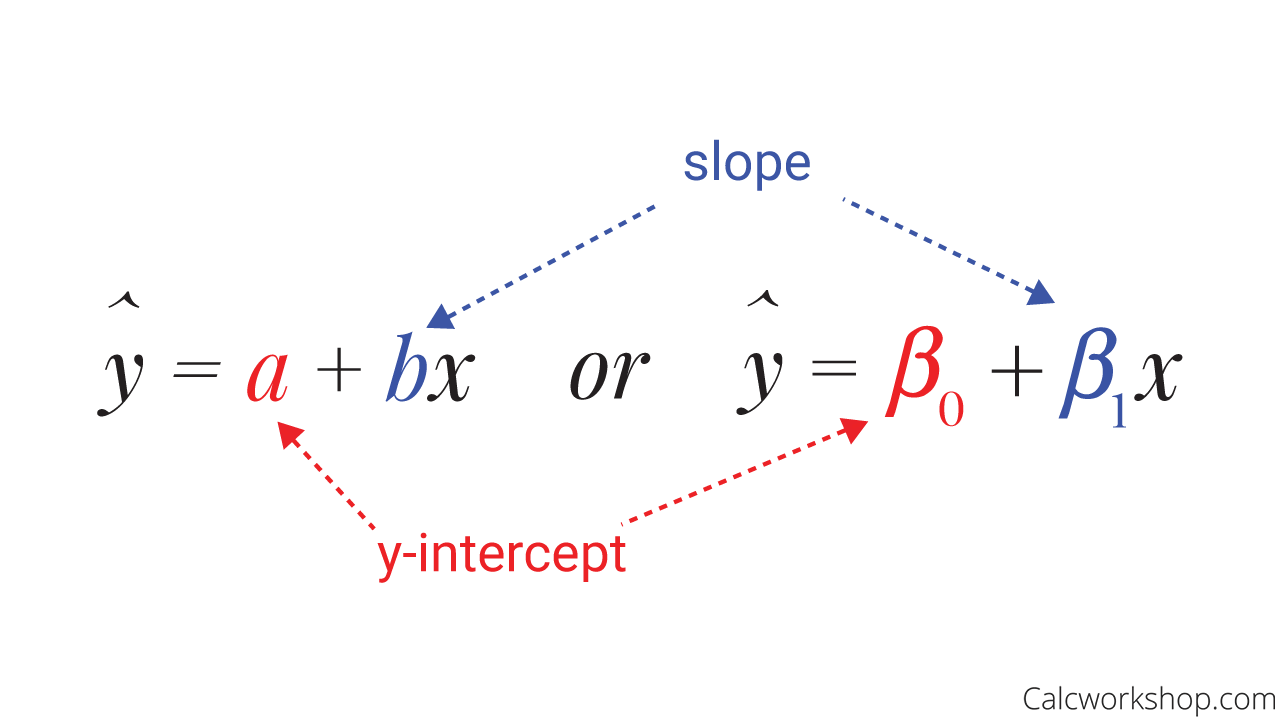

In [1]:
!pip install finnhub-python

In [2]:
import datetime
import finnhub
import time
import pandas as pd
'''
Gather data from Finnhub into a dataframe
'''
def assembleDF(ticker):
    apiKey = 'FINNHUB API KEY HERE'
    client = finnhub.Client(api_key = apiKey)
    data = client.stock_candles(ticker, 'D', int(time.time() - 63113852), int(time.time()))
    df = pd.DataFrame.from_dict(data)
    df = df.dropna()
    df['Date'] = [datetime.datetime.fromtimestamp(i, tz= None) for i in data['t']]
    df = df.groupby('Date').sum()
    df = df.asfreq(freq ='D')
    df['c'] = df['c'].ffill()
    df = df[['c']]
    df.index.freq = 'D'
    df.to_csv(f'{ticker}data.csv')
    return df

In [3]:
import math

def getSTD(series):
  """
  Helper method to calculate standard deviation given a dataset
  """
  average = sum(series) / len(series)
  result = 0
  for value in series:
    squaredDistanceFromMean = (value - average) ** 2
    result += squaredDistanceFromMean
  result /= len(series) - 1
  return math.sqrt(result)

In [4]:
def getCC(x, y):
  """
  Helper method to calculate correlation coefficient given a dataset
  """
  if len(x) != len(y):
    return -1
  xSTD = getSTD(x)
  ySTD = getSTD(y)
  xAv = sum(x) / len(x)
  yAv = sum(y) / len(y)
  result = 0
  for i in range(len(x)):
    result += ((x[i] - xAv) / xSTD) * ((y[i] - yAv) / ySTD)
  result *= (1 / (len(x) - 1))
  return result

In [11]:
### Set x and y coordinates in timeseries fashion, with y being random values, and x being the consecutive time
### series indexes
ticker = 'FCX'
df = assembleDF(ticker)
y = []
x = []
values = df.values.tolist()
indices = df.index.tolist()
for i in range(len(values)):
  y.append(values[i][0])
  x.append(i)
print(indices)

### Calculate averages of x and y, this is reduntant in this example as this is done automatically by the getSTD
### method, however I am still including it
xAv = sum(x) / len(x)
yAv = sum(y) / len(y)

### Calculate coorelation coefficient, this is necessary to calculate slope
r = getCC(x, y)

### Find estimate for slope
xSTD = getSTD(x)
ySTD = getSTD(y)
slope = r * (ySTD / xSTD)

### Find estimate for intercept
intercept = yAv - (slope * xAv)

### Once slope and intercept are calculated, we have the equation for our line: y = (slope * x) + intercept

### Build equation for line and store data points on the line
regressionLine = []
for i in x:
  point = (slope * i) + intercept
  regressionLine.append(point)

### Build Linear Regression based price forecast for the next 5 periods
for i in range(len(x), len(x) + 5):
  point = (slope * i) + intercept
  print(point)


print(regressionLine)

[Timestamp('2021-08-16 00:00:00', freq='D'), Timestamp('2021-08-17 00:00:00', freq='D'), Timestamp('2021-08-18 00:00:00', freq='D'), Timestamp('2021-08-19 00:00:00', freq='D'), Timestamp('2021-08-20 00:00:00', freq='D'), Timestamp('2021-08-21 00:00:00', freq='D'), Timestamp('2021-08-22 00:00:00', freq='D'), Timestamp('2021-08-23 00:00:00', freq='D'), Timestamp('2021-08-24 00:00:00', freq='D'), Timestamp('2021-08-25 00:00:00', freq='D'), Timestamp('2021-08-26 00:00:00', freq='D'), Timestamp('2021-08-27 00:00:00', freq='D'), Timestamp('2021-08-28 00:00:00', freq='D'), Timestamp('2021-08-29 00:00:00', freq='D'), Timestamp('2021-08-30 00:00:00', freq='D'), Timestamp('2021-08-31 00:00:00', freq='D'), Timestamp('2021-09-01 00:00:00', freq='D'), Timestamp('2021-09-02 00:00:00', freq='D'), Timestamp('2021-09-03 00:00:00', freq='D'), Timestamp('2021-09-04 00:00:00', freq='D'), Timestamp('2021-09-05 00:00:00', freq='D'), Timestamp('2021-09-06 00:00:00', freq='D'), Timestamp('2021-09-07 00:00:00'

<ipython-input-2-f4e34e43a144>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('Date').sum()


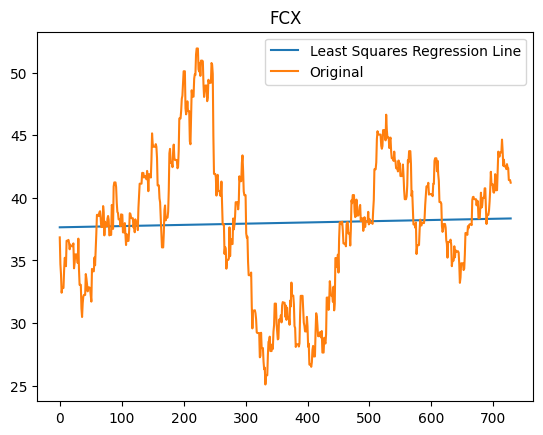

In [12]:
import matplotlib.pyplot as plt

### Finally, Graph the regression line in relation to the established x axis
plt.title(ticker)
plt.plot(x, regressionLine, label="Least Squares Regression Line")
plt.plot(x, y, label='Original')
plt.legend()
plt.show()